In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nil
import pandas as pd
import seaborn as sns


from os import listdir
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
def forest_test(df):
    X = df.iloc[:,:-1]
    Y = df.iloc[:,-1]
    X = X.fillna(0)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=51)
    trained_forest = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)
    prediction_forest = trained_forest.predict(x_test)
    print(confusion_matrix(y_test, prediction_forest))
    print(classification_report(y_test, prediction_forest))
    return prediction_forest

In [3]:
def read_data_from_directory(wafer_class, machine_step):
    
    # Create an empty Dataframe to store all data
    df = pd.DataFrame()
    dir_content = listdir("../Wafer_Data/" + wafer_class + "/" + machine_step + "/")
    dir_content.sort()
    cnt = 0
    for file in dir_content:
        filepath = "../Wafer_Data/" + wafer_class + "/" + machine_step + "/" + file
        print("Reading File {0}".format(file))
        df = df.append(pd.read_csv(filepath))
            
        
    df = df.groupby(['WaferID', "STEP ID"]).describe(percentiles=[])
    wafer_class_bool = nil
    if 'good' in wafer_class:
        df.insert(loc=len(df.columns), column="CLASS", value='Good')
    elif 'bad' in wafer_class:
        df.insert(loc=len(df.columns), column="CLASS", value='Bad')
    return df

In [4]:
def remove_columns(df):
    # Removing "COUNT" Column
    col_index = len(df.columns)-1-6
    while col_index >= 0:
#         print('Removing Column Number: ', col_index)
        df.drop(df.columns[col_index], axis=1, inplace=True)
        col_index = col_index - 6

    # Removing 50% Columns
    col_index = len(df.columns)-1-2
    while col_index >= 0:
#         print('Removing Columns Number: ', col_index)
        df.drop(df.columns[col_index], axis=1, inplace=True)
        # print(df.columns[col_index])
        col_index = col_index - 5

    return df

In [5]:
def find_threshold(results, threshold):
    result_list = []
    current = results[0]
    count = 0
    for value in results:
        if value == current:
            count += 1
        else:
            result_list.append((current, count))
            current = value
            count = 1
    result_list.append((current, count))

    consecutive_found = False
    for key,val in result_list:
        if key == 'Bad' and val > threshold:
            consecutive_found = True
            if val > count: 
                count =val
#             break
    if consecutive_found:
        print("There are about", count, "bad wafers all consecutively bad!\n\tPreventative Mainten")
    else:
        print("The threshold of " , threshold, " consecutively bad wafers were not found.")
    return result_list

In [6]:
def print_heatmap(corr_matrix):
    plt.figure(figsize = (30, 30))
    sns.heatmap(round(corr_matrix, 2), annot=True)
    plt.show()

In [7]:
def run_z1(threshold):
    # reading all Z1 Data
    good_z1_df = read_data_from_directory("good_wafer", "Z1_100")
    bad_z1_df = read_data_from_directory("bad_wafer", "Z1_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z1_df.append(bad_z1_df), columns=good_z1_df.columns)

    # Remove Unnecessary Columns
    df = remove_columns(df)

    # Configuring the Heatmap to make it easier to see 
    print_heatmap(df.corr())

    # Dividing into Inputs and Outputs and run Random Forest Classification
    result = forest_test(df)
    find_threshold(result, threshold)

In [8]:
def run_z2(threshold):
    # reading all Z1 Data
    good_z2_df = read_data_from_directory("good_wafer", "Z2_100")
    bad_z2_df = read_data_from_directory("bad_wafer", "Z2_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z2_df.append(bad_z2_df), columns=good_z2_df.columns)

    # Remove Unnecessary Columns
    df = remove_columns(df)

    # Configuring the Heatmap to make it easier to see 
    print_heatmap(df.corr())

    # Dividing into Inputs and Outputs and run Random Forest Classification
    result = forest_test(df)
    find_threshold(result, threshold)

In [9]:
def run_z3(threshold):
    # reading all Z1 Data
    good_z3_df = read_data_from_directory("good_wafer", "Z3_100")
    bad_z3_df = read_data_from_directory("bad_wafer", "Z3_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z3_df.append(bad_z3_df), columns=good_z3_df.columns)

    # Remove Unnecessary Columns
    df = remove_columns(df)

    # Configuring the Heatmap to make it easier to see 
    print_heatmap(df.corr())

    # Dividing into Inputs and Outputs and run Random Forest Classification
    result = forest_test(df)
    find_threshold(result, threshold)

In [ ]:
threshold = int(input("Enter the threshold: "))
run_z1(threshold)
run_z2(threshold)
run_z3(threshold)

Reading File Good_Z1_100 (1).csv
Reading File Good_Z1_100 (10).csv
Reading File Good_Z1_100 (100).csv
Reading File Good_Z1_100 (101).csv
Reading File Good_Z1_100 (102).csv
Reading File Good_Z1_100 (103).csv
Reading File Good_Z1_100 (104).csv
Reading File Good_Z1_100 (105).csv
Reading File Good_Z1_100 (106).csv
Reading File Good_Z1_100 (107).csv
Reading File Good_Z1_100 (108).csv
Reading File Good_Z1_100 (109).csv
Reading File Good_Z1_100 (11).csv
Reading File Good_Z1_100 (110).csv
Reading File Good_Z1_100 (111).csv
Reading File Good_Z1_100 (112).csv
Reading File Good_Z1_100 (113).csv
Reading File Good_Z1_100 (114).csv
Reading File Good_Z1_100 (115).csv
Reading File Good_Z1_100 (116).csv
Reading File Good_Z1_100 (117).csv
Reading File Good_Z1_100 (118).csv
Reading File Good_Z1_100 (119).csv
Reading File Good_Z1_100 (12).csv
Reading File Good_Z1_100 (120).csv
Reading File Good_Z1_100 (121).csv
Reading File Good_Z1_100 (122).csv
Reading File Good_Z1_100 (123).csv
Reading File Good_Z1_100 

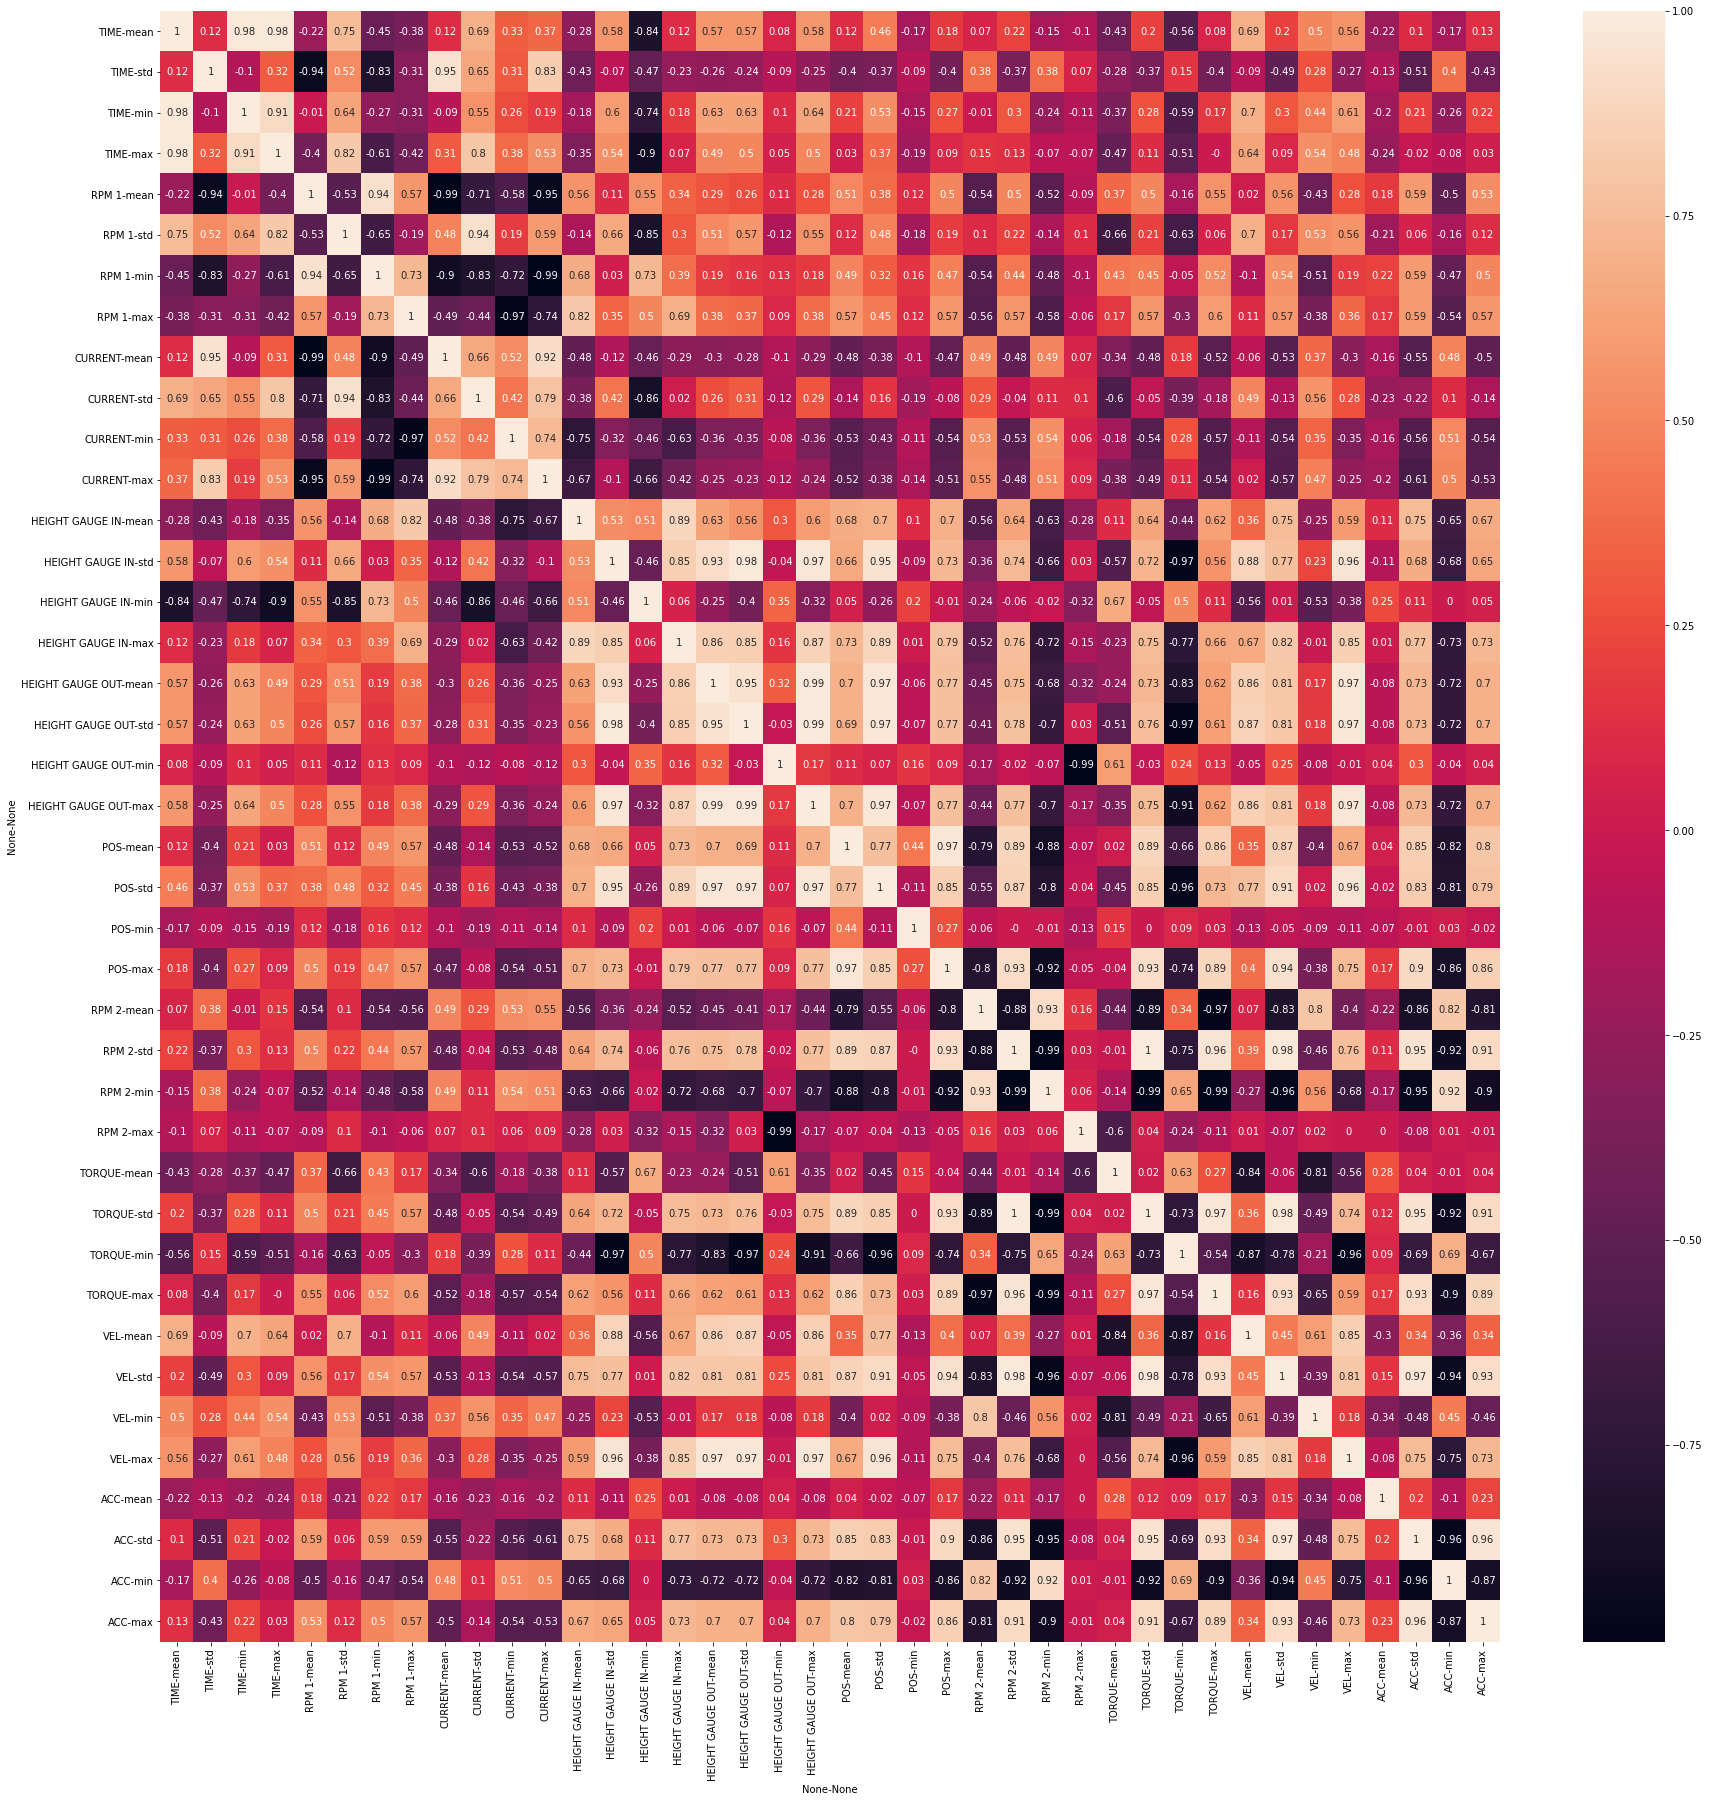

[[458  11]
 [ 17 424]]
              precision    recall  f1-score   support

         Bad       0.96      0.98      0.97       469
        Good       0.97      0.96      0.97       441

    accuracy                           0.97       910
   macro avg       0.97      0.97      0.97       910
weighted avg       0.97      0.97      0.97       910

There are about 15 bad wafers all consecutively bad!


In [12]:
threshold=10
# reading all Z1 Data
good_z1_df = read_data_from_directory("good_wafer", "Z1_100")
bad_z1_df = read_data_from_directory("bad_wafer", "Z1_100")

# Creating combined dataset of both good and bad
df = pd.DataFrame(good_z1_df.append(bad_z1_df), columns=good_z1_df.columns)

# Remove Unnecessary Columns
df = remove_columns(df)

# Configuring the Heatmap to make it easier to see 
print_heatmap(df.corr())

# Dividing into Inputs and Outputs and run Random Forest Classification
result = forest_test(df)
result_list = find_threshold(result, threshold)

In [23]:
df = pd.DataFrame(result_list, columns=['Type','Count'])

In [29]:
df.groupby('Type').max()

,Count
Type,
Bad,15
Good,11
